<a href="https://colab.research.google.com/github/niklaust/SQL/blob/main/SqlMagic_notebook_of_niklaust_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>SQL Magic</b></center></h1>

github:niklaust

# **Hands-on**

In [257]:
! pip install ipython-sql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [258]:
import pandas as pd

In [259]:
print(f'pandas version: {pd.__version__}')

pandas version: 1.3.5


## **Download Database from Google Drive**

In [260]:
# IntheCloudsCo.sqlite

! gdown  11uyRe0NjgRbNSbe4VPDtpyY1BK4pora1

Downloading...
From: https://drive.google.com/uc?id=11uyRe0NjgRbNSbe4VPDtpyY1BK4pora1
To: /content/IntheCloudsCo.sqlite
100% 73.7k/73.7k [00:00<00:00, 68.6MB/s]


In [261]:
# Dessert.sqlite

! gdown 1pLvOX_Uu2vW_ap25B6s-bX-LlhXzzKue

Downloading...
From: https://drive.google.com/uc?id=1pLvOX_Uu2vW_ap25B6s-bX-LlhXzzKue
To: /content/Dessert.sqlite
100% 8.19k/8.19k [00:00<00:00, 15.8MB/s]


# **SQLITE Connection String**

* [sqlalchemy connection string format](https://docs.sqlalchemy.org/en/20/core/engines.html)

In [262]:
dbname='IntheCloudsCo.sqlite'

In [263]:
connection_string = f'sqlite:///{dbname}'

In [264]:
connection_string

'sqlite:///IntheCloudsCo.sqlite'

In [265]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [266]:
%sql sqlite:///IntheCloudsCo.sqlite

'Connected: @IntheCloudsCo.sqlite'

In [267]:
%sql SELECT * FROM Customers limit 5;

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
1,2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,187,Italy
2,3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
3,4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
4,5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


In [268]:
%sql $connection_string

'Connected: @IntheCloudsCo.sqlite'

In [269]:
%sql SELECT * FROM Customers limit 5;

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
1,2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,187,Italy
2,3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
3,4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
4,5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


In [270]:
%%sql
SELECT * 
  FROM sqlite_master
  WHERE type='table';

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Customers,Customers,5,"CREATE TABLE ""Customers"" (\n\t""CustomerID""\tIN..."
2,table,Products,Products,6,"CREATE TABLE ""Products"" (\n\t""ProductID""\tINTE..."
3,table,Category,Category,8,"CREATE TABLE ""Category"" (\n\t""CategoryID""\tTEX..."
4,table,Suppliers,Suppliers,2,"CREATE TABLE ""Suppliers"" (\n\t""SupplierID""\tIN..."
5,table,Orders,Orders,3,"CREATE TABLE ""Orders"" (\n\t""OrderID""\tINTEGER,..."
6,table,Employees,Employees,10,"CREATE TABLE ""Employees"" (\n\t""EmployeeID""\tNU..."
7,table,Shippers,Shippers,12,"CREATE TABLE ""Shippers"" (\n\t""ShipperID""\tINTE..."
8,table,OldOrders,OldOrders,14,"CREATE TABLE ""OldOrders"" (\n\t""OrderID""\tINTEG..."
9,table,OrderDetails,OrderDetails,16,"CREATE TABLE ""OrderDetails"" (\n\t""OrderDetailI..."


In [271]:
%%sql
SELECT * FROM Customers
  WHERE Country = 'Spain';

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
1,11,Jon Calos Amarilla,Jaime Nopales,Calle de València,Barcelona,8013,Spain
2,19,Joana Lopez Roja,Jaime Nopales,Calle de Xàtiva,Valencia,46002,Spain


In [272]:
%%sql
SELECT * FROM Orders
  WHERE   ShipperId = 'NA' OR ShipperID = 'SA';

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10001,1,4,1/1/2020,NA
1,10010,31,10,2/4/2020,SA
2,10011,32,10,5/4/2020,SA
3,10012,33,10,8/4/2020,SA
4,10013,34,10,12/4/2020,SA
5,10033,9,4,6/11/2020,NA
6,10037,17,4,15/12/2020,NA
7,10045,31,10,28/2/2021,SA
8,10046,32,10,5/3/2021,SA
9,10047,33,10,8/3/2021,SA


In [273]:
rs=%sql SELECT ShipperID, count(*) OrderID FROM Orders GROUP BY ShipperID 

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


In [274]:
rs

,ShipperID,OrderID
0,AE,6
1,AF,4
2,ASE,6
3,EN1,10
4,EN2,6
5,ES1,10
6,ES2,6
7,EW1,6
8,EW2,10
9,NA,6


In [275]:
type(rs)

pandas.core.frame.DataFrame

In [276]:
df = pd.DataFrame(rs)
df

,ShipperID,OrderID
0,AE,6
1,AF,4
2,ASE,6
3,EN1,10
4,EN2,6
5,ES1,10
6,ES2,6
7,EW1,6
8,EW2,10
9,NA,6


In [277]:
type(df)

pandas.core.frame.DataFrame

In [278]:
import seaborn as sns

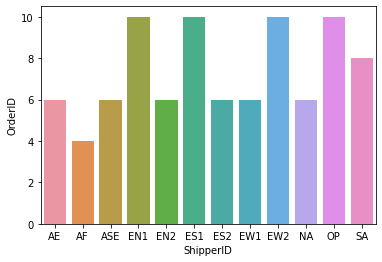

In [279]:
sns.barplot(x='ShipperID', y='OrderID', data=df);

In [280]:
%%sql
update Customers
  set CustomerName = lower(CustomerName);

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
(sqlite3.OperationalError) attempt to write a readonly database
[SQL: update Customers
  set CustomerName = lower(CustomerName);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [281]:
%%sql
SELECT * FROM Customers LIMIT 5;

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
1,2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,187,Italy
2,3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
3,4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
4,5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


#**SqlMagic**

In [282]:
%config SqlMagic

SqlMagic(Magics, Configurable) options
------------------------------------
SqlMagic.autocommit=<Bool>
    Set autocommit mode
    Current: True
SqlMagic.autolimit=<Int>
    Automatically limit the size of the returned result sets
    Current: 0
SqlMagic.autopandas=<Bool>
    Return Pandas DataFrames instead of regular result sets
    Current: True
SqlMagic.column_local_vars=<Bool>
    Return data into local variables from column names
    Current: False
SqlMagic.displaylimit=<Int>
    Automatically limit the number of rows displayed (full result set is still
    stored)
    Current: None
SqlMagic.dsn_filename=<Unicode>
    Path to DSN file. When the first argument is of the form [section], a
    sqlalchemy connection string is formed from the matching section in the DSN
    file.
    Current: 'odbc.ini'
SqlMagic.feedback=<Bool>
    Print number of rows affected by DML
    Current: True
SqlMagic.short_errors=<Bool>
    Don't display the full traceback on SQL Programming Error
    Curre

In [283]:
%config SqlMagic.autopandas = True
# %config SqlMagic.displaycon = False # doesn't have this function 

In [284]:
df=%sql SELECT * FROM Orders;
df

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10001,1,4,1/1/2020,NA
1,10002,7,3,7/1/2020,AE
2,10003,12,7,31/1/2020,EW1
3,10004,22,8,5/2/2020,EN2
4,10005,35,9,11/2/2020,EN1
...,...,...,...,...,...
83,10084,20,7,13/5/2022,EW1
84,10085,3,2,23/5/2022,ES2
85,10086,24,1,5/6/2022,ASE
86,10087,28,6,9/6/2022,ES1


In [285]:
type(df)

pandas.core.frame.DataFrame

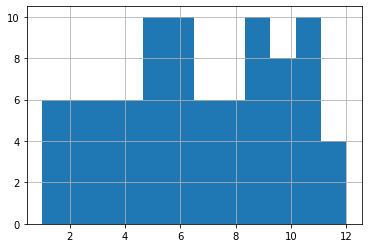

In [286]:
df['EmployeeID'].hist(bins=12);

# **Multiline %% sql to pandas.DataFrame()**

In [287]:
%%sql df2 <<
SELECT *
  FROM Orders
  WHERE ShipperID = 'EN1'
  limit 5;

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.
Returning data to local variable df2


In [288]:
df2

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10005,35,9,11/2/2020,EN1
1,10007,37,9,8/3/2020,EN1
2,10019,38,9,15/6/2020,EN1
3,10031,36,9,14/10/2020,EN1
4,10035,39,9,27/11/2020,EN1


In [289]:
type(df2)

pandas.core.frame.DataFrame

In [290]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     5 non-null      int64 
 1   CustomerID  5 non-null      int64 
 2   EmployeeID  5 non-null      int64 
 3   OrderDate   5 non-null      object
 4   ShipperID   5 non-null      object
dtypes: int64(3), object(2)
memory usage: 328.0+ bytes


In [291]:
df2['OrderDate'] = df2['OrderDate'].astype('datetime64')

In [292]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     5 non-null      int64         
 1   CustomerID  5 non-null      int64         
 2   EmployeeID  5 non-null      int64         
 3   OrderDate   5 non-null      datetime64[ns]
 4   ShipperID   5 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 328.0+ bytes


In [293]:
df2[df2['OrderDate'].dt.year<2021]

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10005,35,9,2020-11-02,EN1
1,10007,37,9,2020-08-03,EN1
2,10019,38,9,2020-06-15,EN1
3,10031,36,9,2020-10-14,EN1
4,10035,39,9,2020-11-27,EN1


# **Switch to other database @dbname**

In [294]:
dbname='Dessert.sqlite'
connection_string=f'sqlite:///{dbname}'

In [295]:
%sql $connection_string

'Connected: @Dessert.sqlite'

In [296]:
%%sql
SELECT * 
  FROM sqlite_master
  WHERE type ='table';

 * sqlite:///Dessert.sqlite
   sqlite:///IntheCloudsCo.sqlite
Done.


,type,name,tbl_name,rootpage,sql
0,table,Menus,Menus,2,"CREATE TABLE ""Menus"" (\n\t""ID""\tINTEGER,\n\t""M..."


In [297]:
%sql SELECT * FROM Menus

 * sqlite:///Dessert.sqlite
   sqlite:///IntheCloudsCo.sqlite
Done.


,ID,Menu,Price
0,1,Éclair,7
1,2,Choux,3
2,3,Puff,3
3,4,Filo,3
4,5,Fruit cake,7
5,6,Fruit tart,7
6,7,Meringue,5
7,8,Sponge cake,5
8,9,Muffin,7
9,10,Chocolate chip,5


In [298]:
df=%sql SELECT Menu, Price FROM Menus;

 * sqlite:///Dessert.sqlite
   sqlite:///IntheCloudsCo.sqlite
Done.


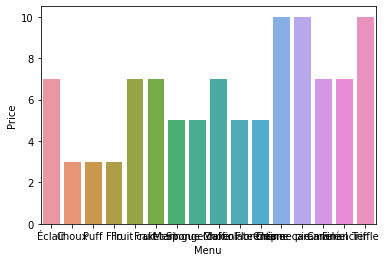

In [299]:
sns.barplot(data=df, x='Menu', y='Price');

In [300]:
%sql @IntheCloudsCo

'Connected: @IntheCloudsCo.sqlite'

In [301]:
%sql SELECT * FROM Customers LIMIT 8;

   sqlite:///Dessert.sqlite
 * sqlite:///IntheCloudsCo.sqlite
Done.


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
1,2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,187,Italy
2,3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
3,4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
4,5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
5,6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
6,7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
7,8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand


In [302]:
%sql @Dessert

'Connected: @Dessert.sqlite'

In [303]:
%%sql
SELECT *
  FROM sqlite_master
  WHERE type ='table';

 * sqlite:///Dessert.sqlite
   sqlite:///IntheCloudsCo.sqlite
Done.


,type,name,tbl_name,rootpage,sql
0,table,Menus,Menus,2,"CREATE TABLE ""Menus"" (\n\t""ID""\tINTEGER,\n\t""M..."


In [304]:
%%sql
SELECT Menu FROM Menus WHERE Menu LIKE 'C%'

 * sqlite:///Dessert.sqlite
   sqlite:///IntheCloudsCo.sqlite
Done.


,Menu
0,Choux
1,Chocolate chip
2,Creame pie
3,Crème caramamel
4,Canelé


# **Reference**

Prasert Kanawattanachai.*สอน JupyterLab: การใช้ %sql magic เพื่อติดต่อกับ SQLite.* https://www.youtube.com/watch?v=NNAohEj4EDU&list=PLoTScYm9O0GHjYJA4pfG38M5BcrWKf5s2&index=18

Catherine Devlin.*ipython-sql*.https://github.com/catherinedevlin/ipython-sql


Myself

github:Niklaust

start 20201128